<a href="https://colab.research.google.com/github/Amal237985/main/blob/main/Flood_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Kerala Flood Prediction Model***

**Basic analysis of the data.**

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data set
data=pd.read_csv("/content/kerala.csv")
data.head(5)

SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0      KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1      KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2      KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3      KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4      KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   

     SEP    OCT    NOV    DEC   ANNUAL RAINFALL FLOODS  
0  197.7  266.9  350.8   48.4            3248.6    YES  
1  491.6  358.4  158.3  121.5            3326.6    YES  
2  341.8  354.1  157.0   59.0            3271.2    YES  
3  222.7  328.1   33.9    3.3            3129.7    YES  
4  217.2  383.5   74.4    0.2            2741.6     NO

In [ ]:
data.drop(['SUBDIVISION'],axis=1,inplace=True)

In [ ]:
data.shape

(118, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              118 non-null    int64  
 1   JAN               118 non-null    float64
 2   FEB               118 non-null    float64
 3   MAR               118 non-null    float64
 4   APR               118 non-null    float64
 5   MAY               118 non-null    float64
 6   JUN               118 non-null    float64
 7   JUL               118 non-null    float64
 8   AUG               118 non-null    float64
 9   SEP               118 non-null    float64
 10  OCT               118 non-null    float64
 11  NOV               118 non-null    float64
 12  DEC               118 non-null    float64
 13   ANNUAL RAINFALL  118 non-null    float64
 14  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
data.isnull().sum()

YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

No null values in any column.

In [ ]:
data.describe()

YEAR         JAN         FEB         MAR         APR  \
count   118.000000  118.000000  118.000000  118.000000  118.000000   
mean   1959.500000   12.218644   15.633898   36.670339  110.330508   
std      34.207699   15.473766   16.406290   30.063862   44.633452   
min    1901.000000    0.000000    0.000000    0.100000   13.100000   
25%    1930.250000    2.175000    4.700000   18.100000   74.350000   
50%    1959.500000    5.800000    8.350000   28.400000  110.400000   
75%    1988.750000   18.175000   21.400000   49.825000  136.450000   
max    2018.000000   83.500000   79.000000  217.200000  238.000000   

              MAY          JUN          JUL          AUG         SEP  \
count  118.000000   118.000000   118.000000   118.000000  118.000000   
mean   228.644915   651.617797   698.220339   430.369492  246.207627   
std    147.548778   186.181363   228.988966   181.980463  121.901131   
min     53.400000   196.800000   167.500000   178.600000   41.300000   
25%    125.050000   535.550000   533.200000   316.725000  155.425000   
50%    184.600000   625.600000   691.650000   386.250000  223.550000   
75%    264.875000   786.975000   832.425000   500.100000  334.500000   
max    738.800000  1098.200000  1526.500000  1398.900000  526.700000   

              OCT         NOV         DEC   ANNUAL RAINFALL  
count  118.000000  118.000000  118.000000        118.000000  
mean   293.207627  162.311017   40.009322       2925.405085  
std     93.705253   83.200485   36.676330        452.169407  
min     68.500000   31.500000    0.100000       2068.800000  
25%    222.125000   93.025000   10.350000       2613.525000  
50%    284.300000  152.450000   31.100000       2934.300000  
75%    355.150000  218.325000   54.025000       3170.400000  
max    567.900000  365.600000  202.300000       4473.000000

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['FLOODS']=data['FLOODS'].replace({'YES':1,'NO':0})
data.head()

YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG    SEP    OCT  \
0  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5  197.7  266.9   
1  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8  491.6  358.4   
2  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2  341.8  354.1   
3  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8  222.7  328.1   
4  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6  217.2  383.5   

     NOV    DEC   ANNUAL RAINFALL  FLOODS  
0  350.8   48.4            3248.6       1  
1  158.3  121.5            3326.6       1  
2  157.0   59.0            3271.2       1  
3   33.9    3.3            3129.7       1  
4   74.4    0.2            2741.6       0

In [ ]:
data.corr()

YEAR       JAN       FEB       MAR       APR       MAY  \
YEAR              1.000000 -0.225531  0.003879 -0.012842  0.086865 -0.059661   
JAN              -0.225531  1.000000  0.019613  0.078626  0.034807  0.071420   
FEB               0.003879  0.019613  1.000000  0.245375  0.123706 -0.083500   
MAR              -0.012842  0.078626  0.245375  1.000000  0.074014 -0.102961   
APR               0.086865  0.034807  0.123706  0.074014  1.000000 -0.114566   
MAY              -0.059661  0.071420 -0.083500 -0.102961 -0.114566  1.000000   
JUN              -0.174938  0.189375  0.054114  0.019000  0.072990  0.001235   
JUL              -0.223403  0.034423  0.005789  0.018330  0.014977 -0.046518   
AUG               0.044173  0.008677  0.023259  0.042411 -0.047842 -0.124412   
SEP               0.107655 -0.113502  0.066317  0.143850  0.012928  0.116860   
OCT              -0.030223 -0.035044  0.053133 -0.023066  0.113172  0.197102   
NOV              -0.130129 -0.011034 -0.162880 -0.032612  0.022206  0.094934   
DEC              -0.123643 -0.089809 -0.127025  0.026292 -0.110392 -0.118077   
 ANNUAL RAINFALL -0.198048  0.118648  0.061457  0.116103  0.112358  0.314723   
FLOODS           -0.202548  0.145313 -0.035730  0.086739  0.034392  0.242813   

                       JUN       JUL       AUG       SEP       OCT       NOV  \
YEAR             -0.174938 -0.223403  0.044173  0.107655 -0.030223 -0.130129   
JAN               0.189375  0.034423  0.008677 -0.113502 -0.035044 -0.011034   
FEB               0.054114  0.005789  0.023259  0.066317  0.053133 -0.162880   
MAR               0.019000  0.018330  0.042411  0.143850 -0.023066 -0.032612   
APR               0.072990  0.014977 -0.047842  0.012928  0.113172  0.022206   
MAY               0.001235 -0.046518 -0.124412  0.116860  0.197102  0.094934   
JUN               1.000000  0.094939 -0.014549 -0.052634  0.001156  0.015967   
JUL               0.094939  1.000000  0.154467  0.209441  0.025223 -0.028526   
AUG              -0.014549  0.154467  1.000000  0.098215 -0.181496 -0.112729   
SEP              -0.052634  0.209441  0.098215  1.000000 -0.032348 -0.027615   
OCT               0.001156  0.025223 -0.181496 -0.032348  1.000000 -0.024060   
NOV               0.015967 -0.028526 -0.112729 -0.027615 -0.024060  1.000000   
DEC              -0.085188 -0.013573  0.142090 -0.011007 -0.039067  0.070720   
 ANNUAL RAINFALL  0.453407  0.651990  0.413036  0.428344  0.205861  0.148783   
FLOODS            0.442531  0.442774  0.286690  0.376385  0.060088  0.238852   

                       DEC   ANNUAL RAINFALL    FLOODS  
YEAR             -0.123643         -0.198048 -0.202548  
JAN              -0.089809          0.118648  0.145313  
FEB              -0.127025          0.061457 -0.035730  
MAR               0.026292          0.116103  0.086739  
APR              -0.110392          0.112358  0.034392  
MAY              -0.118077          0.314723  0.242813  
JUN              -0.085188          0.453407  0.442531  
JUL              -0.013573          0.651990  0.442774  
AUG               0.142090          0.413036  0.286690  
SEP              -0.011007          0.428344  0.376385  
OCT              -0.039067          0.205861  0.060088  
NOV               0.070720          0.148783  0.238852  
DEC               1.000000          0.042967  0.054326  
 ANNUAL RAINFALL  0.042967          1.000000  0.776231  
FLOODS            0.054326          0.776231  1.000000

**Exploratory analysis of data using plots**

<Axes: xlabel='FLOODS'>

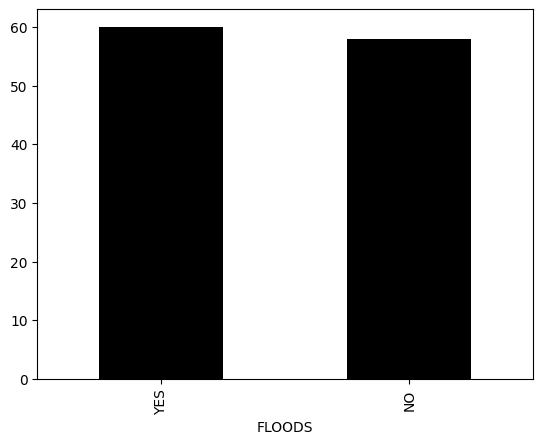

In [ ]:
data['FLOODS'].value_counts().plot(kind='bar',color='black')

Data is almost well balanced.

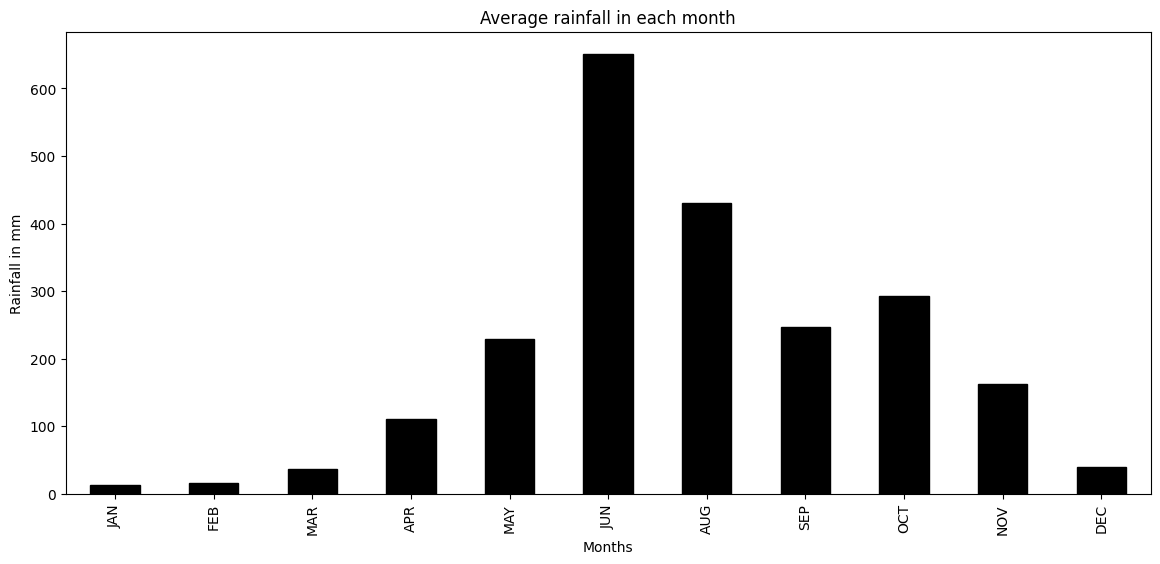

In [ ]:
data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind='bar',edgecolor='k',color='black',figsize=(14,6))
plt.title('Average rainfall in each month')
plt.ylabel('Rainfall in mm')
plt.xlabel('Months')
plt.show()

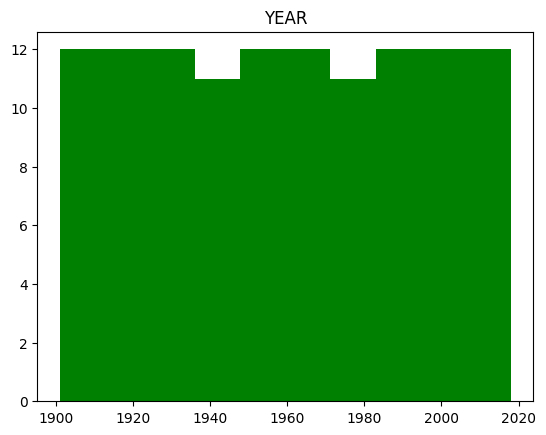

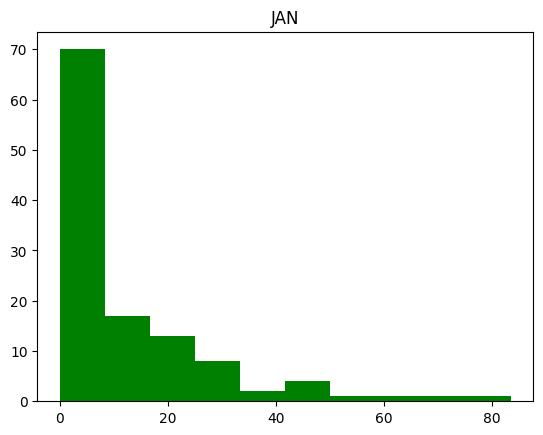

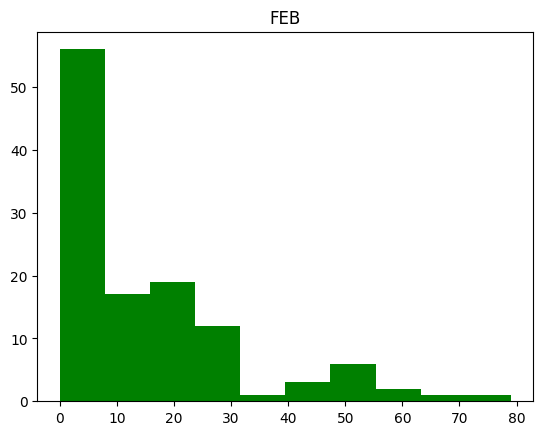

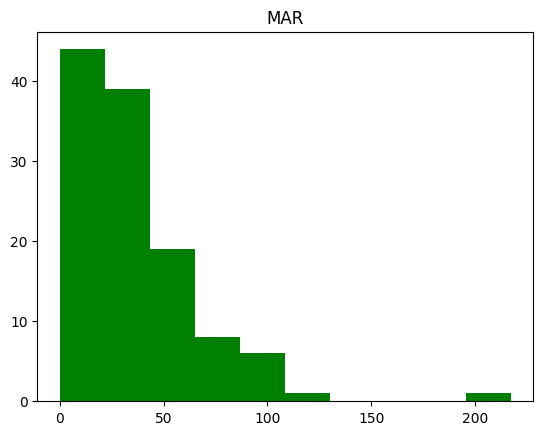

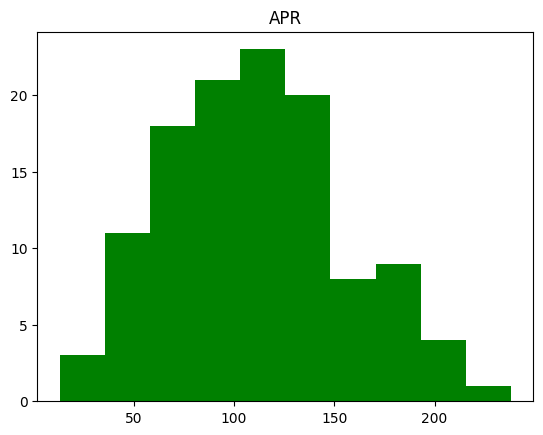

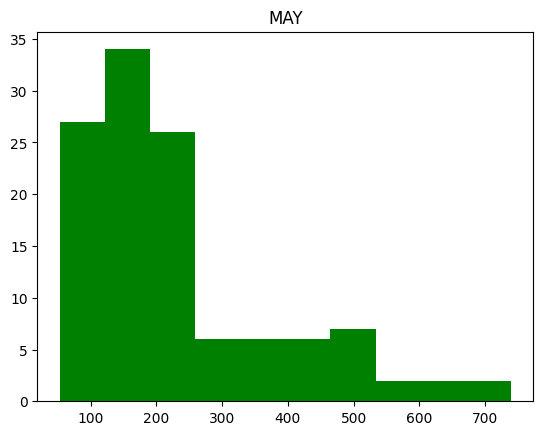

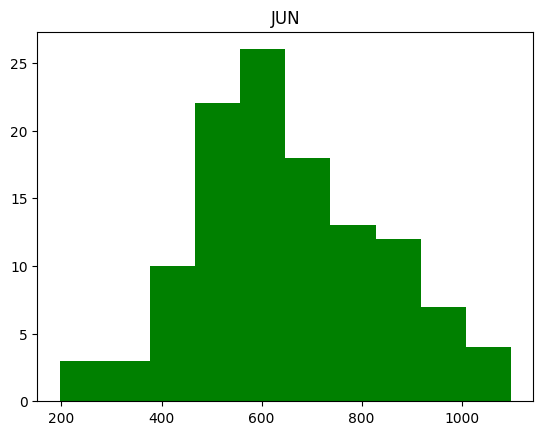

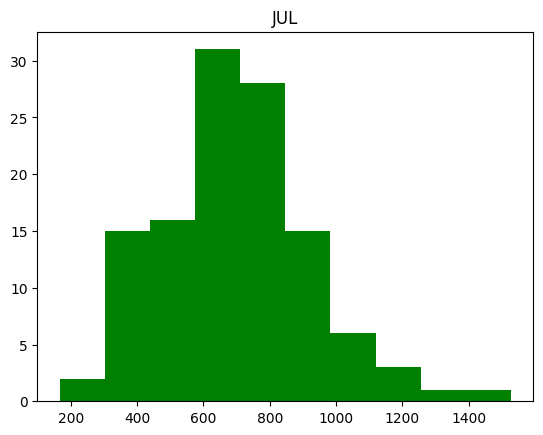

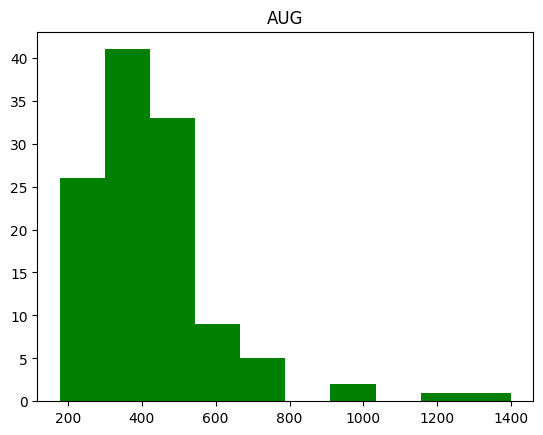

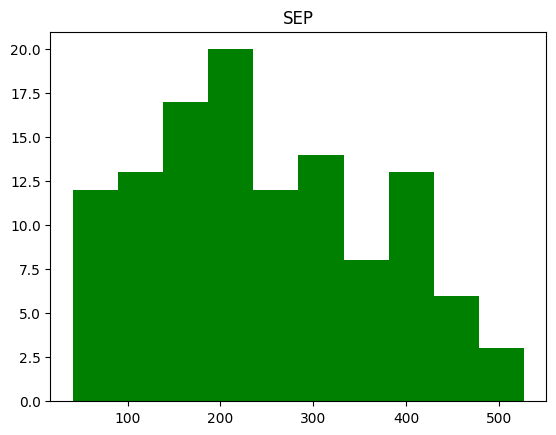

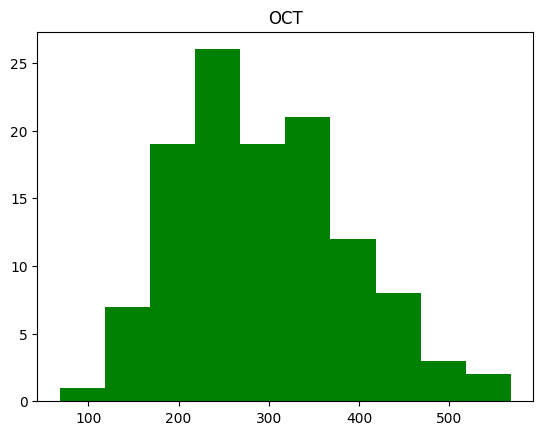

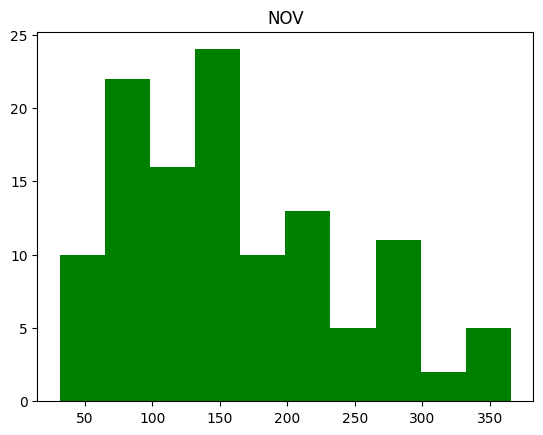

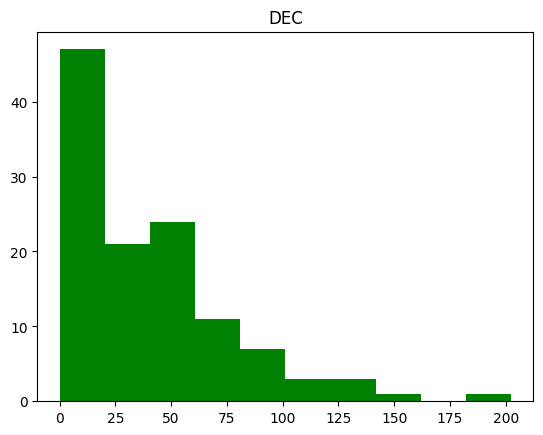

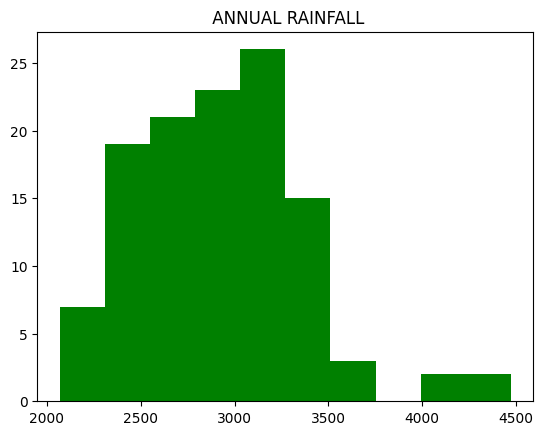

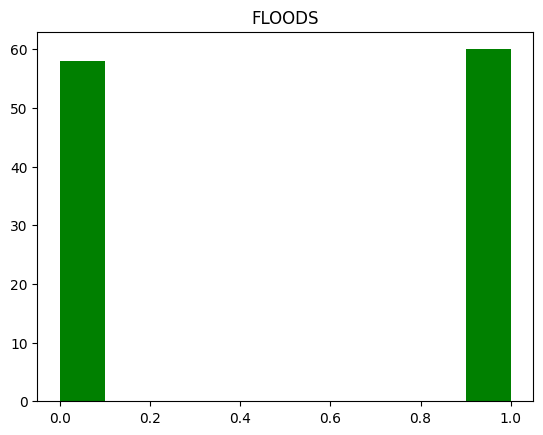

In [ ]:
for i in data.columns:
  plt.hist(data[i],color='green')
  plt.title(i)
  plt.show()


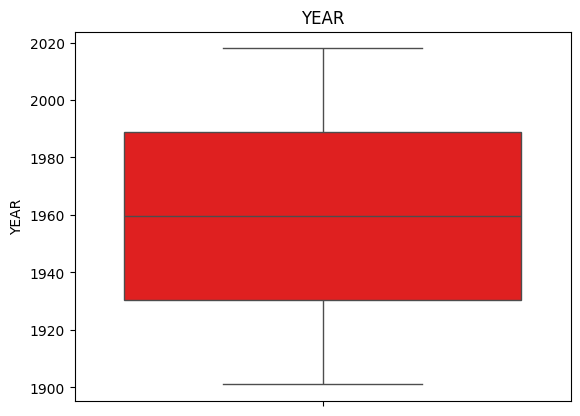

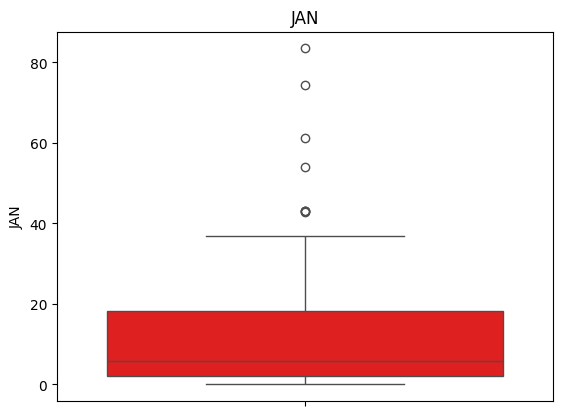

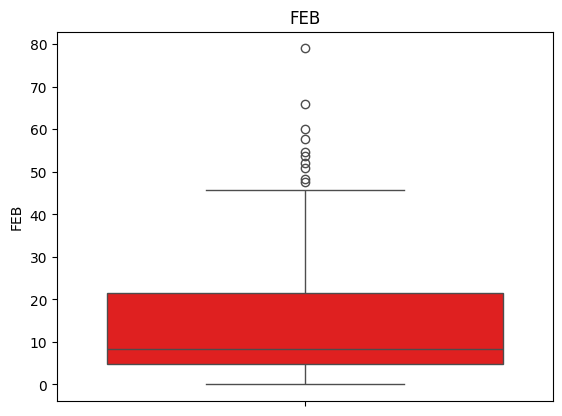

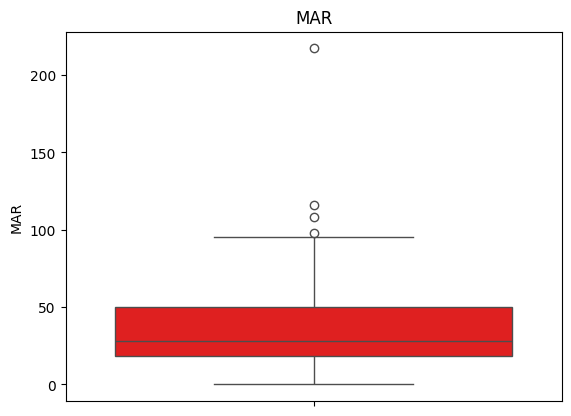

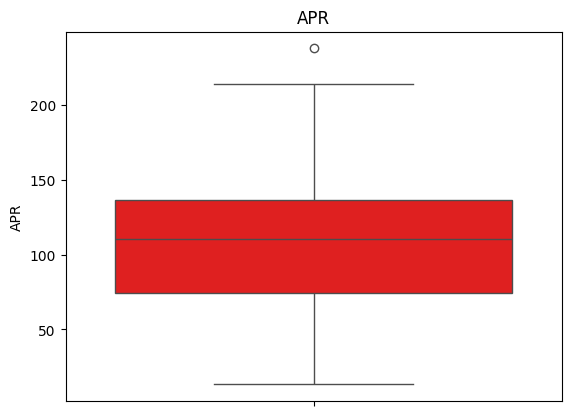

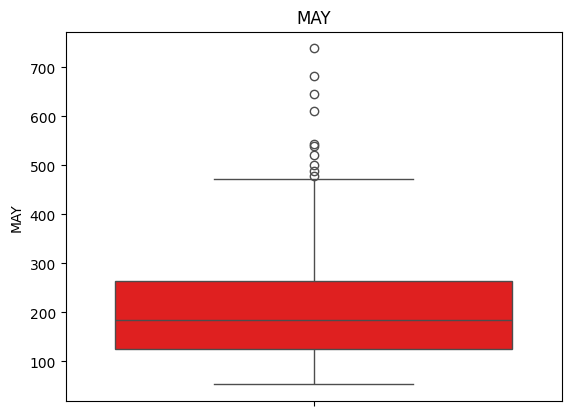

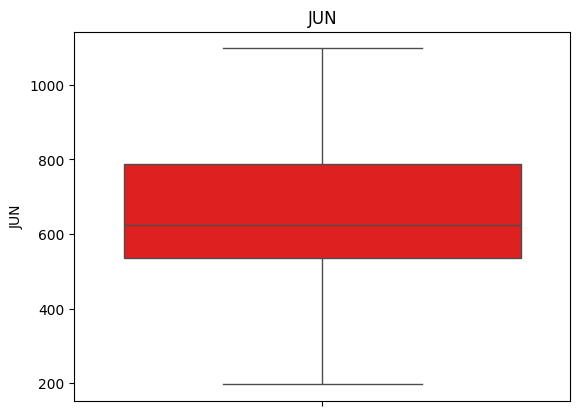

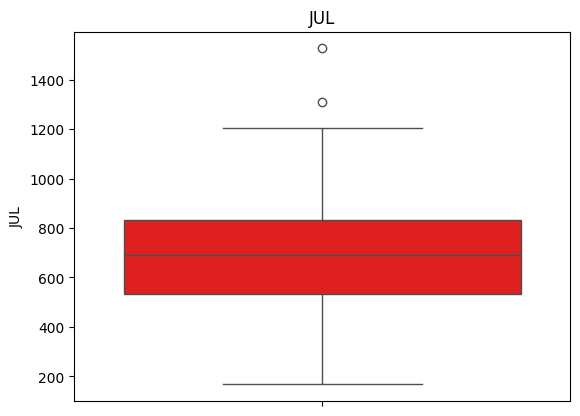

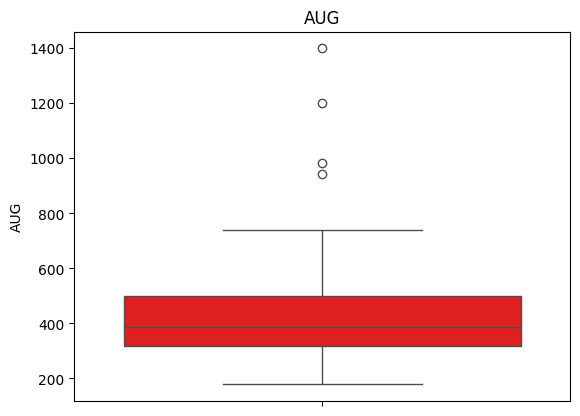

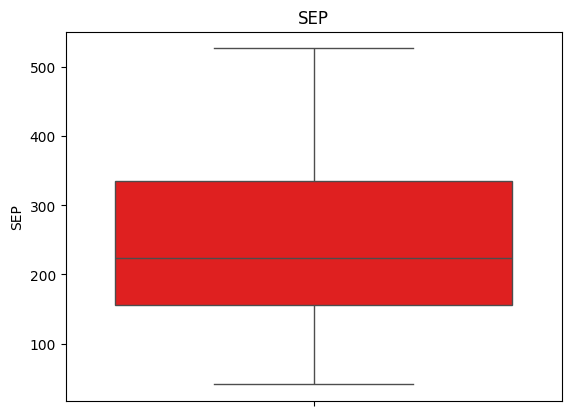

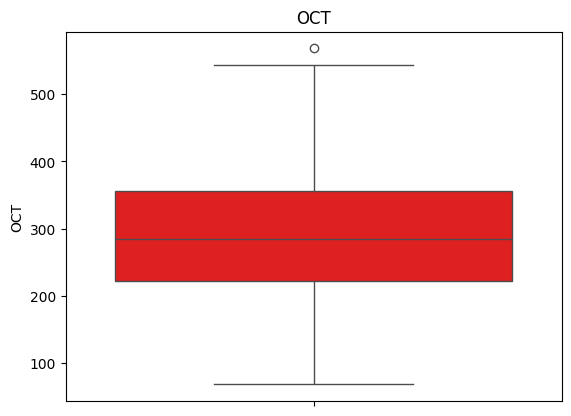

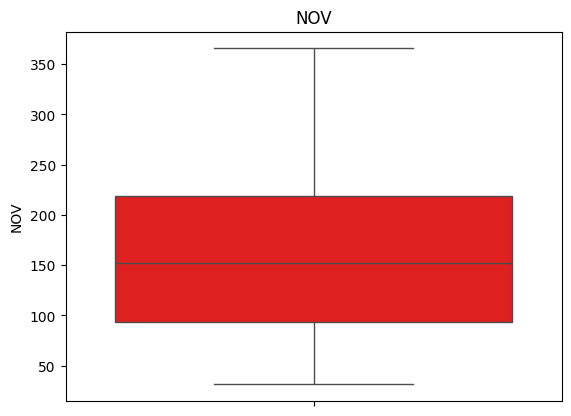

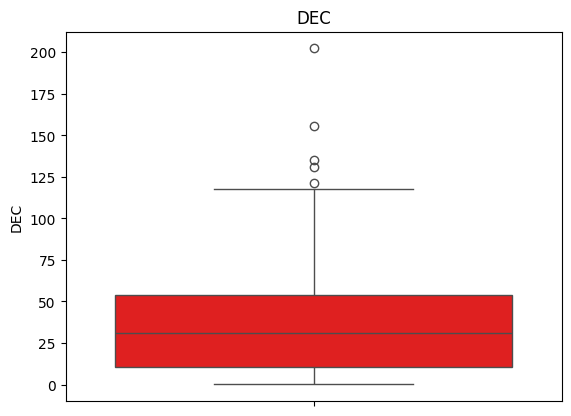

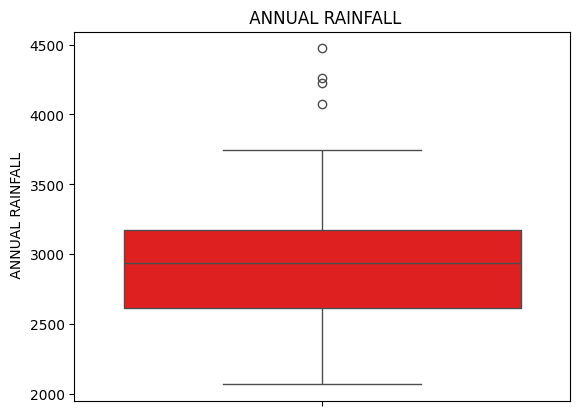

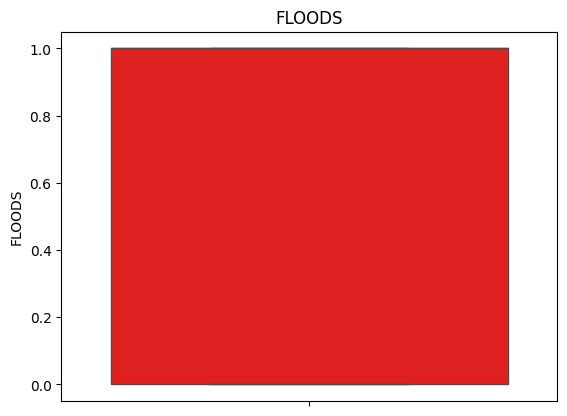

In [ ]:
for i in data.columns:
  sns.boxplot(data[i],color='red')
  plt.title(i)
  plt.show()

Multivariate analysis

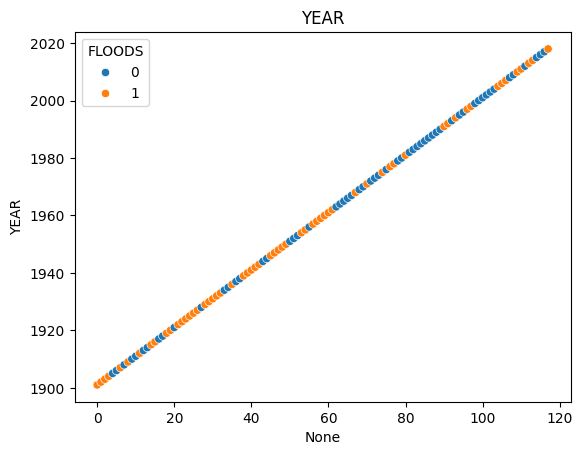

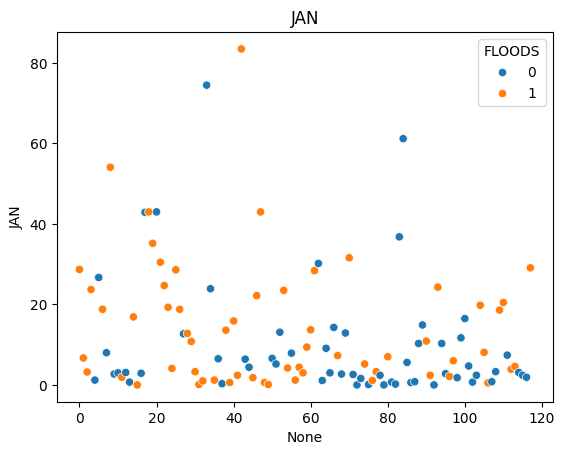

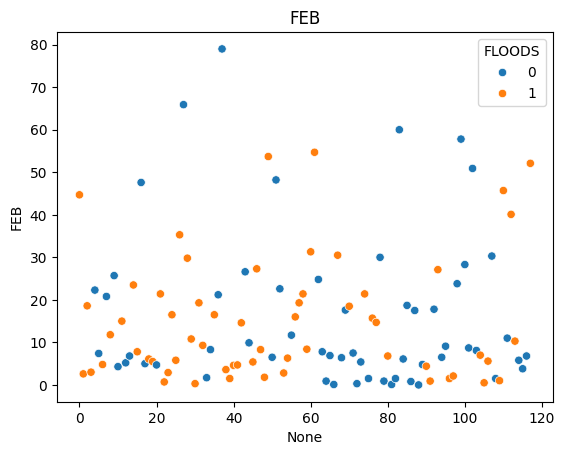

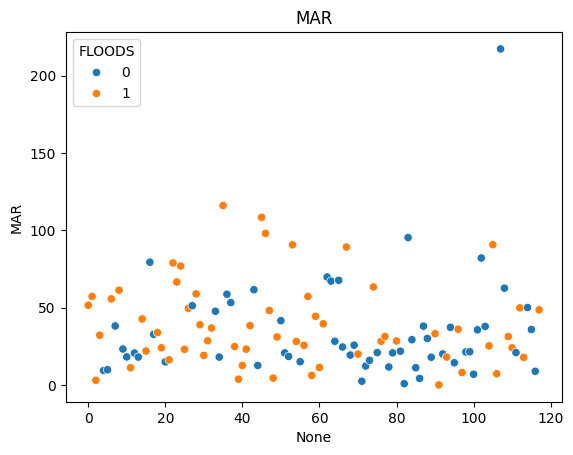

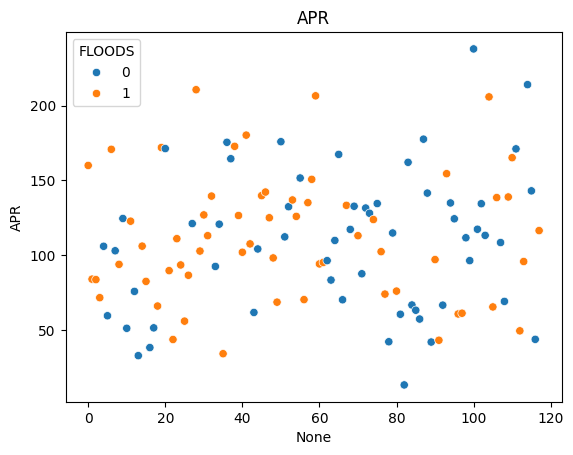

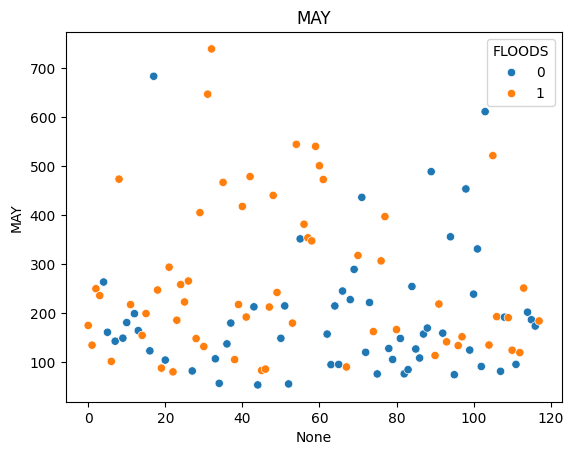

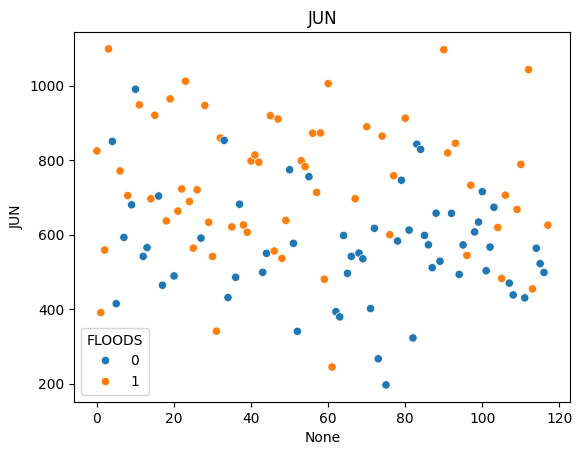

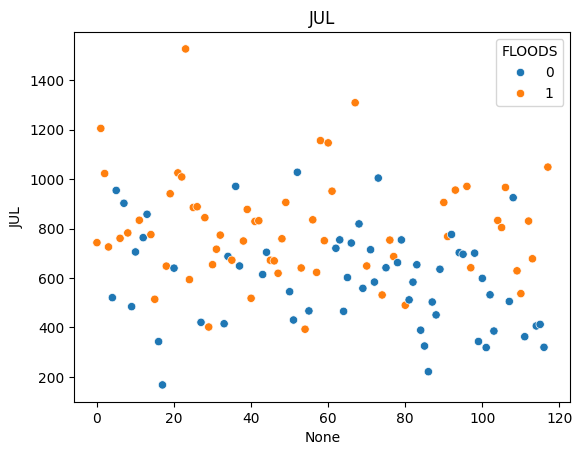

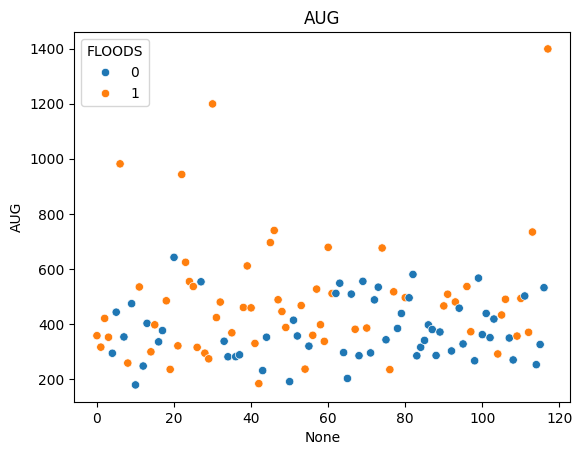

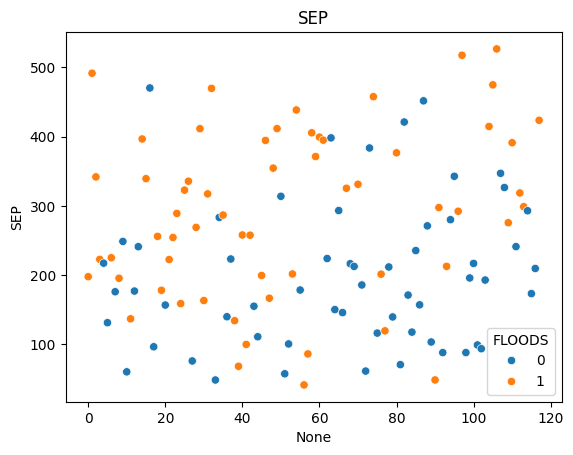

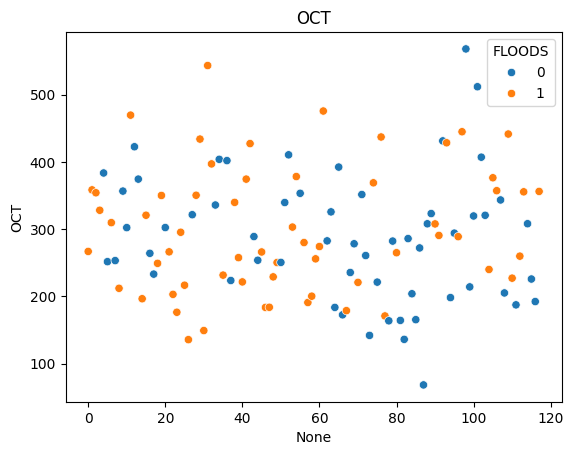

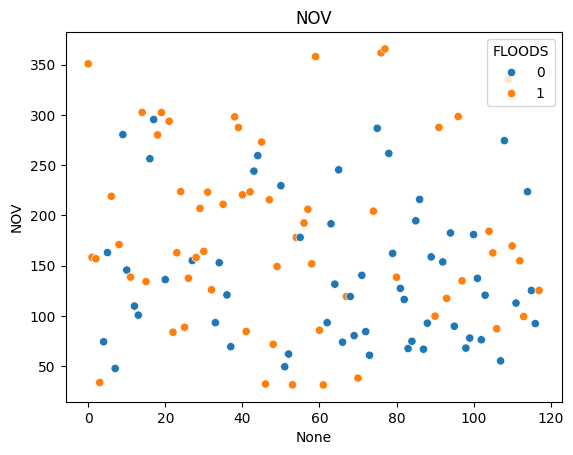

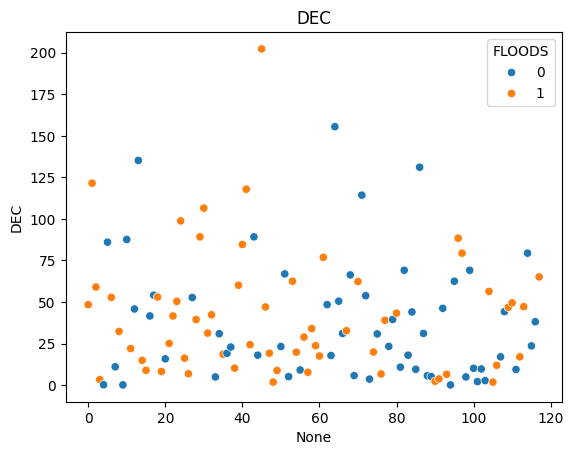

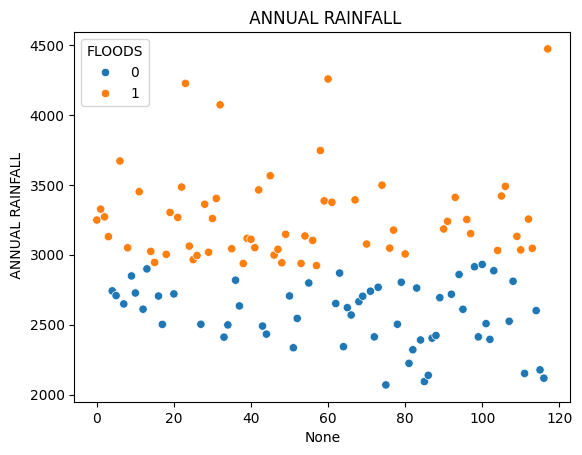

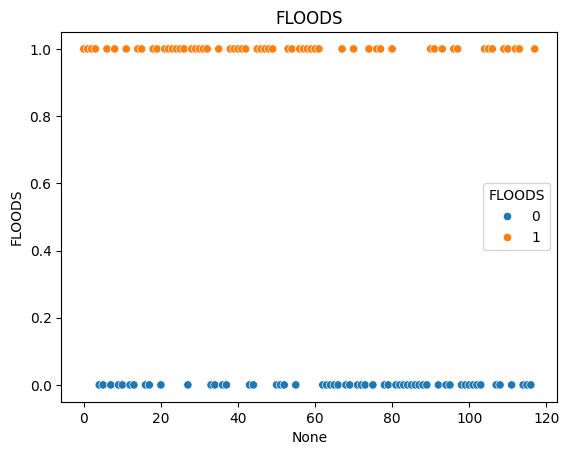

In [ ]:
for i in data.columns:
  sns.scatterplot(x=data.index,y=data[i],hue=data['FLOODS'])
  plt.title(i)
  plt.show()

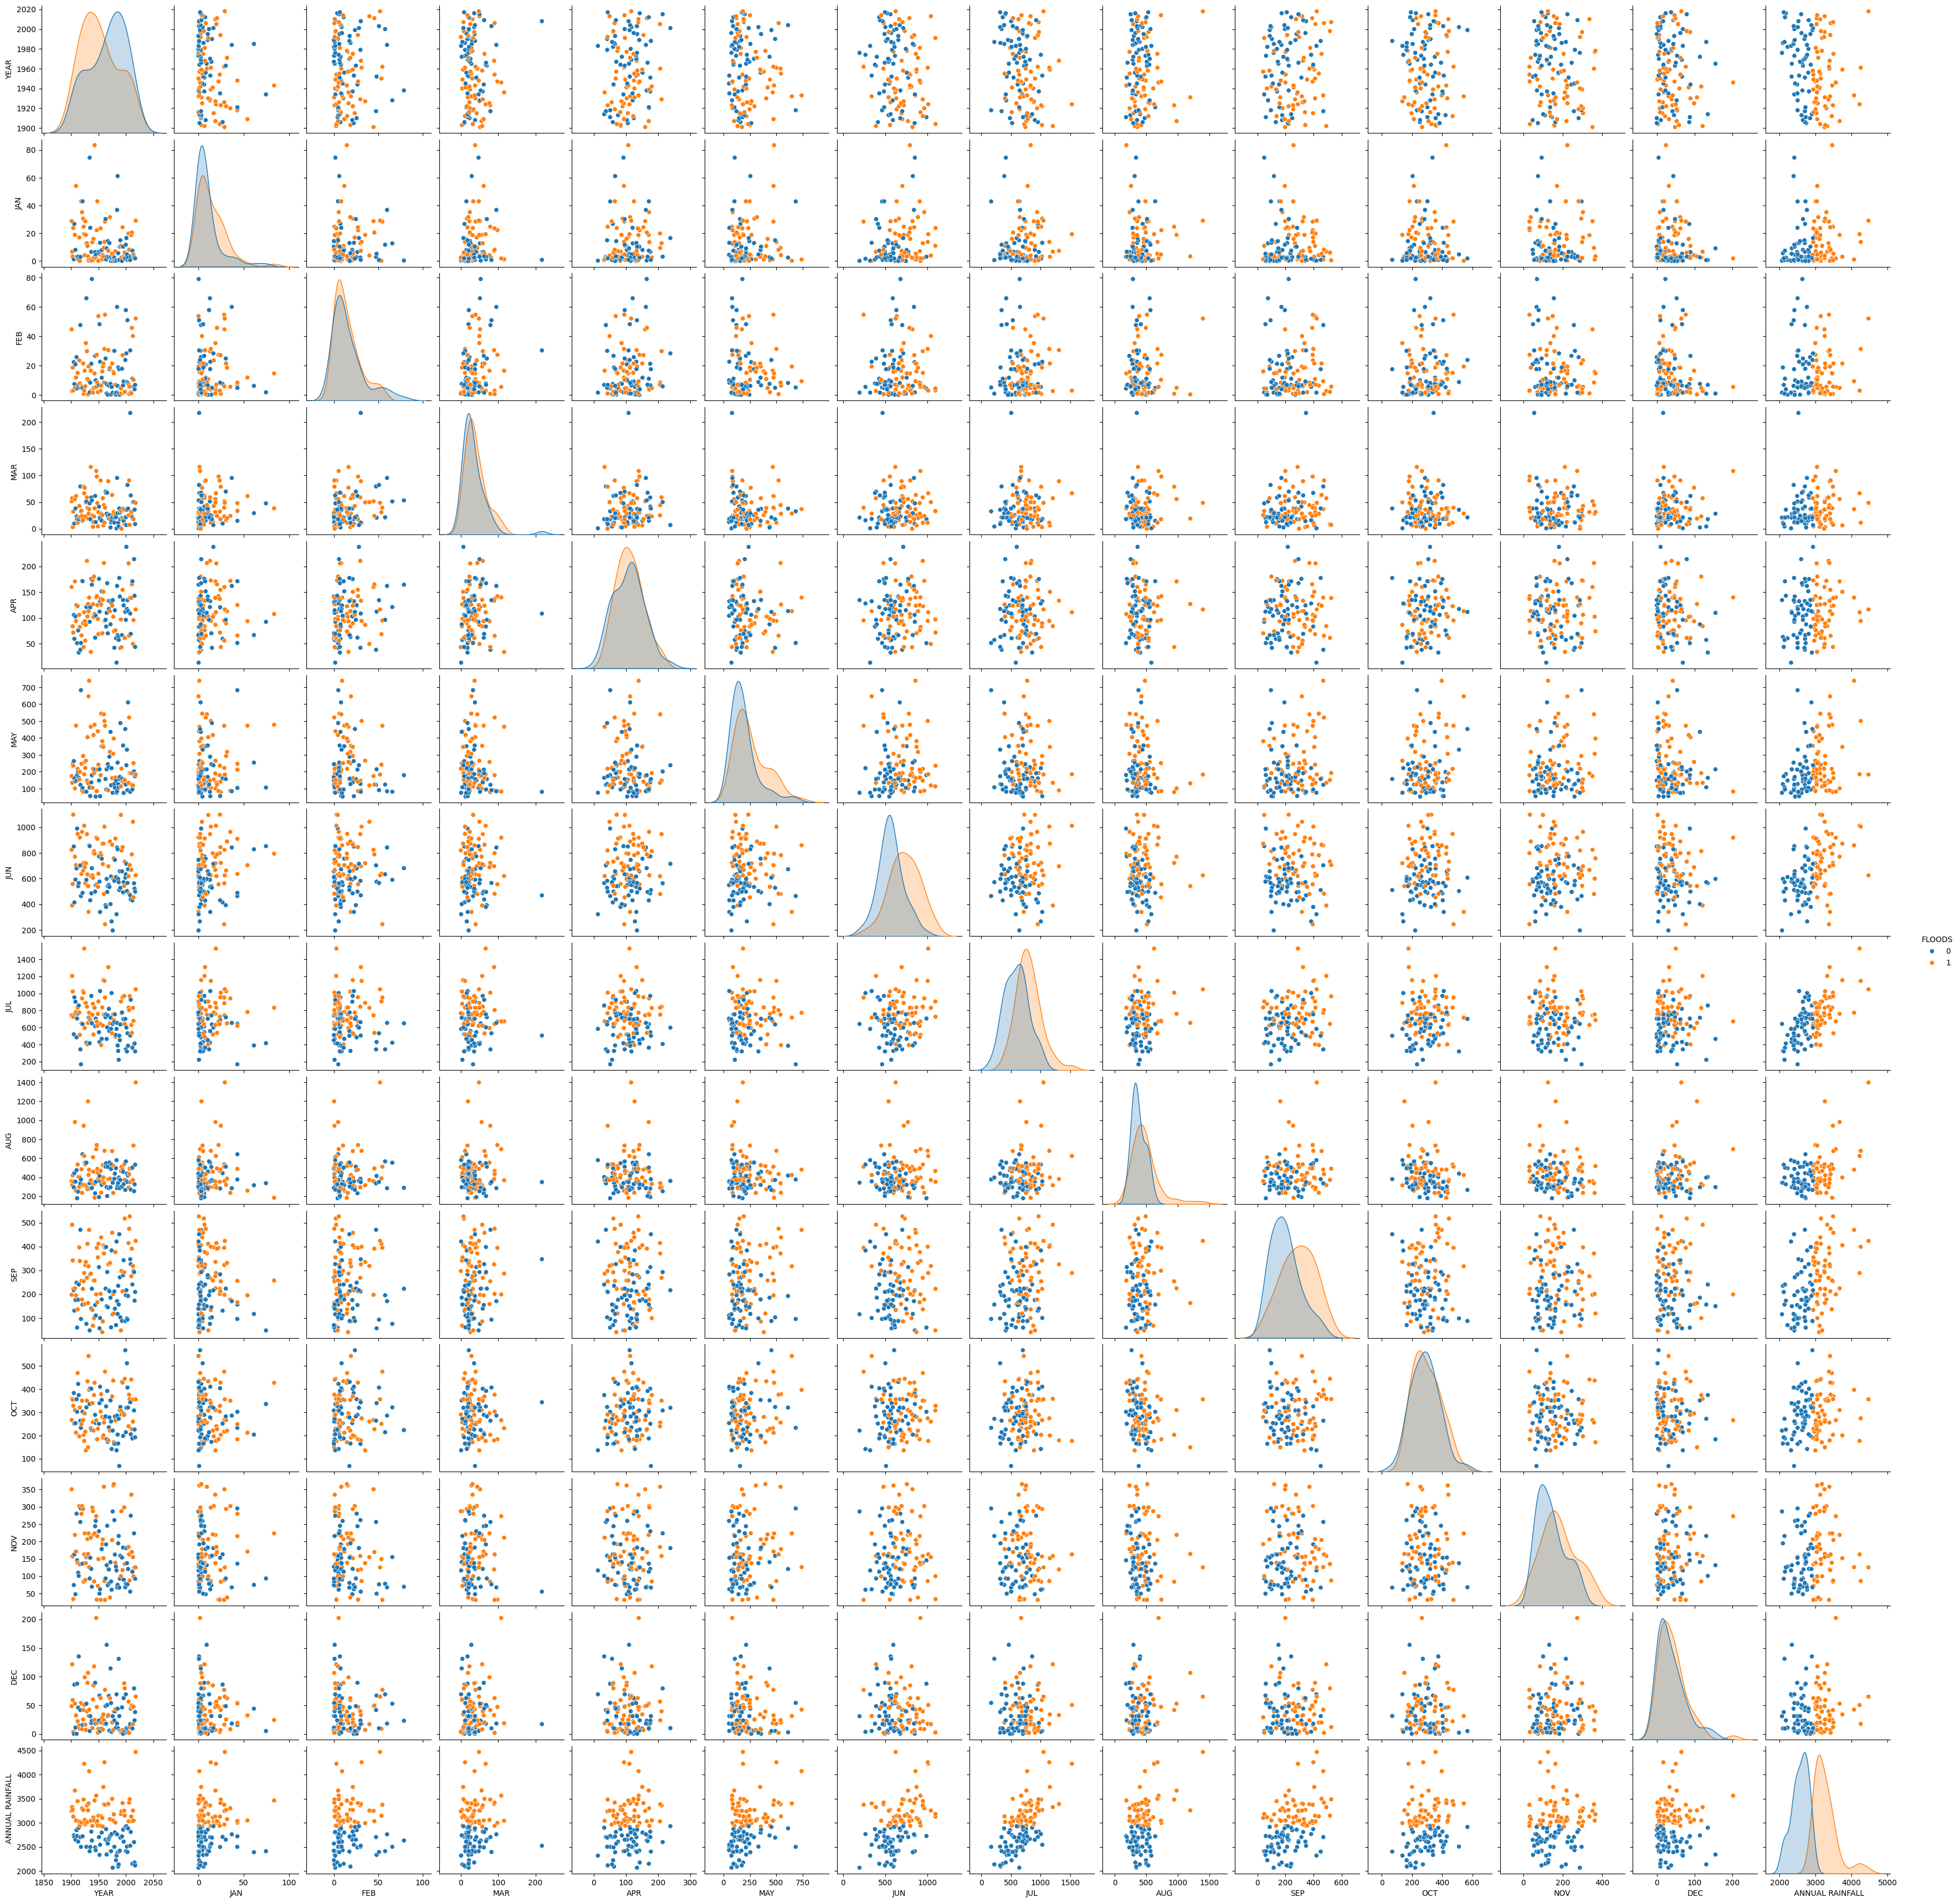

In [ ]:
sns.pairplot(data,hue='FLOODS')


## ***Train test split and Feature engineering***

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
x=data.iloc[:,1:13]
y=data.iloc[:,-1]
x

JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG    SEP    OCT  \
0    28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5  197.7  266.9   
1     6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8  491.6  358.4   
2     3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2  341.8  354.1   
3    23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8  222.7  328.1   
4     1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6  217.2  383.5   
..    ...   ...   ...    ...    ...     ...     ...     ...    ...    ...   
113   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9  298.8  355.5   
114   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2  292.9  308.1   
115   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5  173.2  225.9   
116   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8  209.5  192.4   
117  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9  423.6  356.1   

       NOV    DEC  
0    350.8   48.4  
1    158.3  121.5  
2    157.0   59.0  
3     33.9    3.3  
4     74.4    0.2  
..     ...    ...  
113   99.5   47.2  
114  223.6   79.4  
115  125.4   23.6  
116   92.5   38.1  
117  125.4   65.1  

[118 rows x 12 columns]

In [ ]:
minmax=preprocessing.MinMaxScaler()
minmax.fit(x).transform(x)

array([[0.34371257, 0.56582278, 0.23721787, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.08023952, 0.03291139, 0.26347305, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.03832335, 0.23544304, 0.01381852, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.02874251, 0.04810127, 0.16490097, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.02275449, 0.08607595, 0.04053432, ..., 0.24809772, 0.18258007,
        0.18793274],
       [0.34850299, 0.65949367, 0.22339936, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)
x_train

JAN   FEB   MAR    APR    MAY    JUN     JUL    AUG    SEP    OCT    NOV  \
40  15.9   4.6  12.7  101.9  417.5  797.6   517.9  458.5  257.9  221.6  220.5   
64   9.1   0.9  28.3  109.8  214.5  597.7   465.1  296.1  150.1  183.7  131.7   
48   0.6   1.8   4.5   98.1  440.0  536.3   758.7  445.2  354.5  229.1   71.9   
26  18.8  35.3  49.6   86.5  265.4  720.2   888.2  315.0  335.6  135.8  137.6   
89  14.9   4.8  18.0   41.8  488.5  528.6   635.4  370.8  103.3  323.2  158.8   
..   ...   ...   ...    ...    ...    ...     ...    ...    ...    ...    ...   
87   0.8  17.5  38.1  177.6  157.2  511.3   502.8  379.8  451.7   68.5   67.0   
19  35.2   5.5  24.1  172.0   87.7  964.3   940.8  235.0  178.0  350.1  302.3   
16   2.9  47.6  79.4   38.1  122.9  703.7   342.7  335.1  470.3  264.1  256.4   
67   7.3  30.5  89.2  133.3   90.0  696.4  1308.9  380.7  325.4  178.9  119.4   
4    1.2  22.3   9.4  105.9  263.3  850.2   520.5  293.6  217.2  383.5   74.4   

      DEC  
40   84.6  
64  155.5  
48    1.8  
26    6.8  
89    5.2  
..    ...  
87   31.1  
19    8.2  
16   41.6  
67   32.7  
4     0.2  

[94 rows x 12 columns]

Outlier detection and removal

# ***Machine learning algorithms***

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [ ]:
accuracy=[]
roc_auc=[]
precision=[]
recall=[]
f1=[]

# **1) Logistic Regression (LR)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
model=LogisticRegression()
scaler=StandardScaler()
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.fit_transform(x_test)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y=model.predict(x_train)

In [ ]:
# training accuracy ,roc scores.
print("\naccuracy score:%f"%(accuracy_score(y_train,y)*100))
print("Recall Score:%f"%(recall_score(y_train,y)*100))
#print("roc score:%f"%(roc_auc_score(y_train,y)*100))
#print(confusion_matrix(y_train,y))


accuracy score:65.957447
Recall Score:72.916667


In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1])

In [ ]:
y_test.values

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0])

In [ ]:
# testing accuracy ,roc scores.
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print("f1 score:%f"%(f1_score(y_test,y_pred)*100))


accuracy score:54.166667
Recall Score:50.000000
roc score:54.166667
f1 score:52.173913


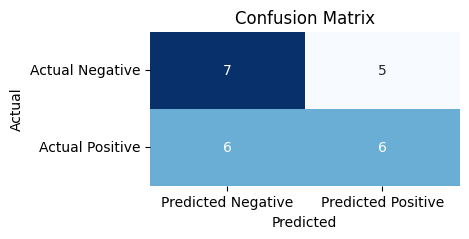

In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy.append(accuracy_score(y_test,y_pred)*100)
recall.append(recall_score(y_test,y_pred)*100)
roc_auc.append(roc_auc_score(y_test,y_pred)*100)
f1.append(f1_score(y_test,y_pred)*100)

# ***2) Support Vector Machine (SVM)***

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)

In [ ]:
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0])

In [ ]:
y_test.values

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0])

In [ ]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print("f1 score:%f"%(f1_score(y_test,y_pred)*100))


accuracy score:95.833333
Recall Score:100.000000
roc score:95.833333
f1 score:96.000000


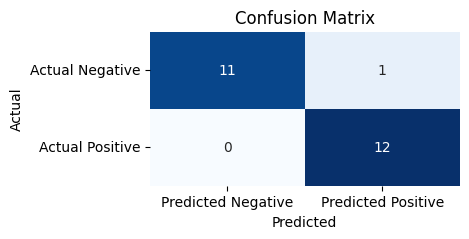

In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy.append(accuracy_score(y_test,y_pred)*100)
recall.append(recall_score(y_test,y_pred)*100)
roc_auc.append(roc_auc_score(y_test,y_pred)*100)
f1.append(f1_score(y_test,y_pred)*100)

# ***3) Decision Tree Classifier (DTC)***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier()

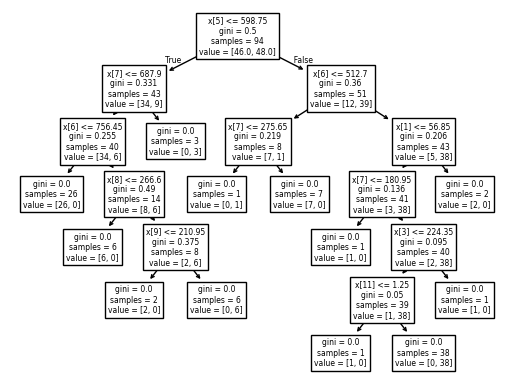

In [ ]:
plot_tree(clf)
plt.show()

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0])

In [ ]:
y_test.values

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0])

In [ ]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print("f1 score:%f"%(f1_score(y_test,y_pred)*100))


accuracy score:75.000000
Recall Score:75.000000
roc score:75.000000
f1 score:75.000000


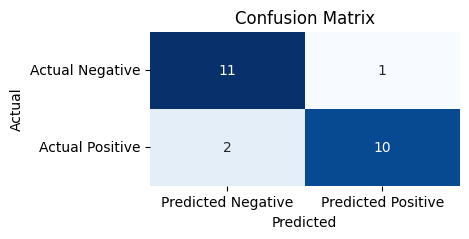

In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy.append(accuracy_score(y_test,y_pred)*100)
recall.append(recall_score(y_test,y_pred)*100)
roc_auc.append(roc_auc_score(y_test,y_pred)*100)
f1.append(f1_score(y_test,y_pred)*100)

# ***4) Random Forest classifier (RFC)***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

**GridSearchCV**

In [ ]:
n_estimators=[20,60,100]
max_features=[0.2,0.4,0.6,1.0]
max_depth=[2,6,8,None]
max_samples=[0.5,0.75,1.0]

In [ ]:
param_grid={"n_estimators":[20,60,80],
            "max_features":[0.6,1.0],
            "max_depth":[6,8,None],
            "max_samples":[0.5,0.75,1.0]}

In [ ]:
fclf=RandomForestClassifier()
fclf_grid=RandomizedSearchCV(estimator=fclf,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1)

In [ ]:
fclf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [6, 8, None],
                                        'max_features': [0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [20, 60, 80]},
                   verbose=2)

In [ ]:
fclf_grid.best_params_

{'max_depth': 6, 'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 60}

In [ ]:
fclf_grid.best_score_

0.8280701754385966

In [ ]:
clf=RandomForestClassifier(n_estimators=60,max_features=0.6,max_depth=6,max_samples=0.5)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0])

In [ ]:
y_test.values

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0])

In [ ]:
fclf=RandomForestClassifier(n_estimators=60,max_features=0.6,max_depth=6,max_samples=0.5)
fclf.fit(x_train,y_train)
y_pred=fclf.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0])

In [ ]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print("f1 score:%f"%(f1_score(y_test,y_pred)*100))


accuracy score:87.500000
Recall Score:91.666667
roc score:87.500000
f1 score:88.000000


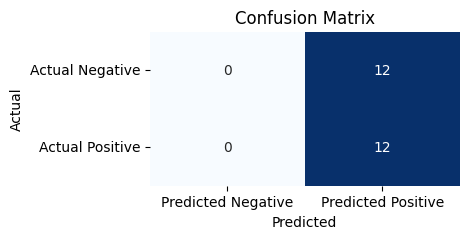

In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy.append(accuracy_score(y_test,y_pred)*100)
recall.append(recall_score(y_test,y_pred)*100)
roc_auc.append(roc_auc_score(y_test,y_pred)*100)
f1.append(f1_score(y_test,y_pred)*100)

# ***5) K Nearest Neighbours Classifier (KNN)***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train,y_train)
y_pred=knn_clf.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0])

In [ ]:
y_test.values

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0])

In [ ]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print("f1 score:%f"%(f1_score(y_test,y_pred)*100))


accuracy score:79.166667
Recall Score:91.666667
roc score:79.166667
f1 score:81.481481


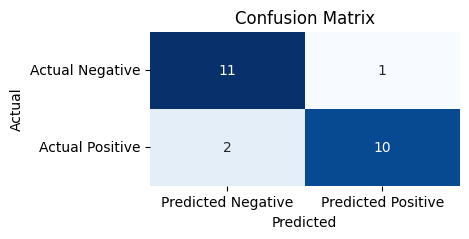

In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy.append(accuracy_score(y_test,y_pred)*100)
recall.append(recall_score(y_test,y_pred)*100)
roc_auc.append(roc_auc_score(y_test,y_pred)*100)
f1.append(f1_score(y_test,y_pred)*100)

# ***6) Naive Bayes classifier (NBC)***

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0])

In [ ]:
y_test.values

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0])

In [ ]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print("f1 score:%f"%(f1_score(y_test,y_pred)*100))


accuracy score:75.000000
Recall Score:75.000000
roc score:75.000000
f1 score:75.000000


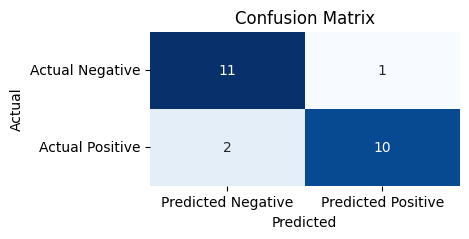

In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy.append(accuracy_score(y_test,y_pred)*100)
recall.append(recall_score(y_test,y_pred)*100)
roc_auc.append(roc_auc_score(y_test,y_pred)*100)
f1.append(f1_score(y_test,y_pred)*100)

# ***Gradient Boosting Machines (GBM)***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm=GradientBoostingClassifier()
gbm.fit(x_train,y_train)
y_pred=gbm.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0])

In [ ]:
y_test.values

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0])

In [ ]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall Score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print("f1 score:%f"%(f1_score(y_test,y_pred)*100))


Accuracy score:87.500000 
roc score:87.500000 
[[11  1]
 [ 2 10]]


In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy.append(accuracy_score(y_test,y_pred)*100)
recall.append(recall_score(y_test,y_pred)*100)
roc_auc.append(roc_auc_score(y_test,y_pred)*100)
f1.append(f1_score(y_test,y_pred)*100)

# ***Comparing the models***

In [ ]:
df=pd.DataFrame({'accuracy':accuracy,'recall':recall,'roc_auc':roc_auc,'f1_score':f1},index=['LR','SVM','DTC','RFC','KNN','NBC','GBM'])
df

accuracy      recall    roc_auc   f1_score
LR   54.166667   83.333333  54.166667  64.516129
SVM  95.833333  100.000000  95.833333  96.000000
DTC  75.000000   75.000000  75.000000  75.000000
RFC  87.500000   91.666667  87.500000  88.000000
KNN  79.166667   91.666667  79.166667  81.481481
NBC  75.000000   75.000000  75.000000  75.000000
GBM  87.500000   83.333333  87.500000  86.956522

<Axes: >

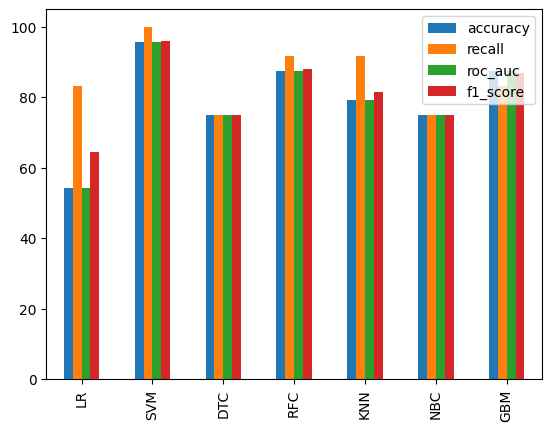

In [ ]:
df.plot(kind='bar')